# Python bibliotek

Python-bibliotek är samlingar av fördefinierade funktioner och verktyg som används för att lösa specifika uppgifter eller tillhandahålla vissa funktionaliteter. Vi har redan använt ett par bibliotek hittills såsom math. Ett annat exempel på ett sådant bibliotek är Matplotlib, som är en populär visualiseringsbibliotek för Python.

När vi använder Matplotlib eller andra bibliotek i Python, behöver vi först importera dem till vårt program genom att använda import-satsen. Till exempel:

In [1]:
import random

Nu kan du använda `random` funktioner och submoduler med `random.funktion`, till exempel `random.gauss` som ger en slumptal efter en gaussisk fördelning.

In [2]:
help(random.gauss)

mu = 5.0
sigma = 0.1
print(random.gauss(mu, sigma))

Help on method gauss in module random:

gauss(mu, sigma) method of random.Random instance
    Gaussian distribution.
    
    mu is the mean, and sigma is the standard deviation.  This is
    slightly faster than the normalvariate() function.
    
    Not thread-safe without a lock around calls.

4.935833577018984


Men du kan också importera bara den som du behöver:

In [3]:
from random import gauss
print(gauss(mu, sigma)) # Nu behöver du inte random.gauss men bara gauss

4.9476555446533474


Du kan också ge ett namn till funktion/bibliotek som du importerar:

In [4]:
from random import gauss as randgauss

print(randgauss(mu, sigma))

5.131890541885367


Vissa bibliotek kommer direkt med Python-installationen, medan andra behöver laddas ner separat:

* **Standardbibliotek:** Python kommer med ett omfattande standardbibliotek som innehåller många moduler och verktyg för att utföra olika uppgifter. Dessa bibliotek är utvecklade och underhållna av Python-gemenskapen och är tillgängliga direkt när du installerar Python. Exempel på sådana bibliotek är `math`, `os`, `datetime`, `random` osv. Du kan använda dessa bibliotek utan att behöva installera något ytterligare.
* **Tredjepartsbibliotek:** Utöver standardbiblioteket finns det tusentals tredjepartsbibliotek som utvecklats av olika organisationer eller enskilda utvecklare runt om i världen. Dessa bibliotek erbjuder mer specialiserade funktioner och verktyg för olika ändamål, såsom datavisualisering, maskininlärning, webbutveckling osv. För att använda dessa bibliotek måste du ladda ner och installera dem separat. Exempel på sådana bibliotek inkluderar`NumPy`, `Pandas`, `Matplotlib`, `RDKit` och många fler.

För att installera tredjepartsbibliotek kan du använda pakethanteraren pip eller conda.

## Rita grafer (plotta)
En viktig del av vetenskap är att på ett bra och vettigt sätt kunna visulasiera sin data. I python görs detta enkelt genom ett bibliotek som heter `matplotlib`. Vi ska nu testa och se vilka funktionalliteter detta bibliotek har. Vi börjar med att importera det och samtidigt skapa kortkommandot plt (för plot).

In [1]:
import matplotlib
import matplotlib.pyplot as plt

### Vi börjar genom att skapa två listor med tal

In [6]:
C = 1.
k=0.2
dt = 0.01
T=1000
Cr = []
t = []
Cr.append(C)
t.append(0)
for i in range(0,T):
    C = C*(1.-k*dt)
    Cr.append(C+random.gauss(0.0,0.05)) # Här simulerar vi experimentellt "brus"
    t.append((i+1)*dt)

## Plot()
Vi använder nu oss av `plt.plot()` för att visualisera vår data. Som ni ser nedan så tar `plt.plot()` i detta fallet två argument, första är $x$-värdena och den andra $y$-värdena. Funktionen `plt.show()` visar grafen.
I Jupyter så kan bilden enkelt sparas genom att dra figuren till en katalog eller skrivbordet.

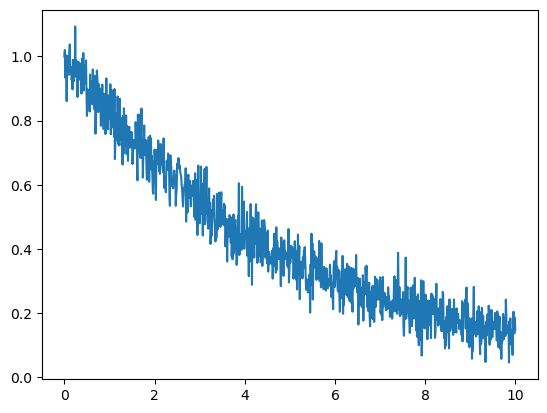

In [7]:
plt.plot(t,Cr)
plt.show()

### Man kan enkelt ändra stilen på sina linjer, eller välja att ha dem som symboler

I detta fall har vi ändrar vi `linestyle`, också förkortat `ls`.


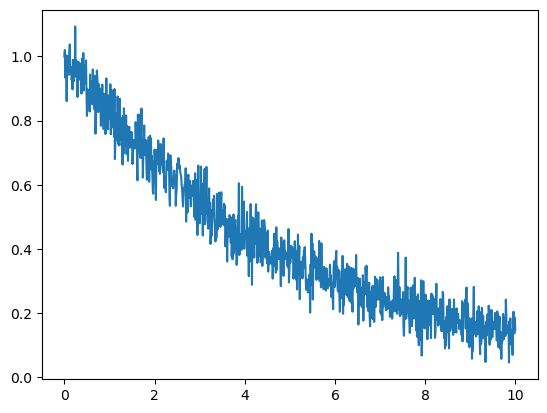

In [8]:
plt.plot(t,Cr,ls='-')
plt.show()

# Övning 1:

Ändra linjestilen. Testa `'-'`,`':'` och `'-.'`

### Använda markörer istället

Detta kan enkelt göras genom att lägga till argumentet `marker`. Oftast stängs linjen av genom `ls=''`.

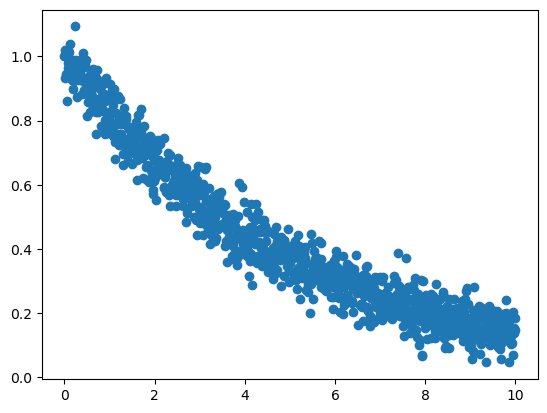

In [9]:
plt.plot(t,Cr,ls='',marker='o')
plt.show()

# Övning 2:

Testa att ändra markören från `'o'` till `'s'` eller `'<'`. Testa även att lägga till argumentet `markevery=40`.

### Ändra färg

Kan även detta enkelt göras genom argumentetn color, eller kort `c='k'`

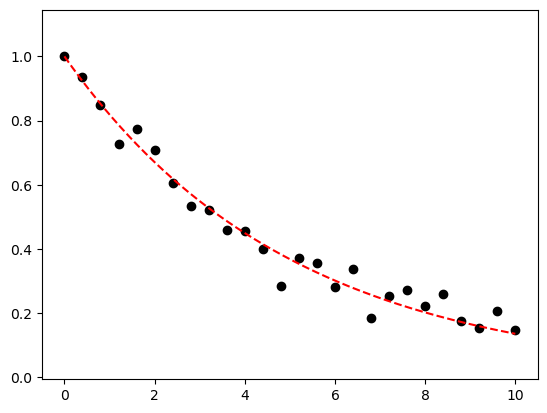

In [10]:
import math
expt = []
for i in range(T+1):
    expt.append(math.exp(-k*(i*dt)))

plt.plot(t,Cr,ls='',marker='o',markevery=40,c='k')
plt.plot(t,expt,ls='--',c='r')
plt.show()

### Lägg till beskrivande text på axlarna samt ändra storlek på linjer/markörer

Storlek ändrar vi genom `ms` (eller `markersize`) och linjetjocklek med `lw` (eller `linewidth`).

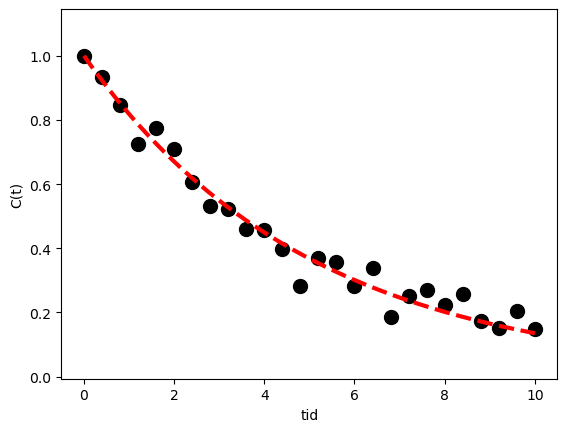

In [11]:
plt.plot(t,Cr,ls='',marker='o',markevery=40,color='k',ms=10)
plt.plot(t,expt,ls='--',c='r',lw=3)
plt.xlabel('tid')
plt.ylabel('C(t)')
plt.show()

# Övning 3
Ändra symbolerna (se [här](https://matplotlib.org/stable/api/markers_api.html)), färgerna (se [här](https://matplotlib.org/stable/gallery/color/named_colors.html#sphx-glr-gallery-color-named-colors-py)), och linjen i ovanstående graf. Lägg dessutom till enheter på axlarna (t.ex. [M] och [s])

### Lägg till figurlegender
Ibland vill man ha beskrivande legender i figurern. Även detta är lätt gjort.

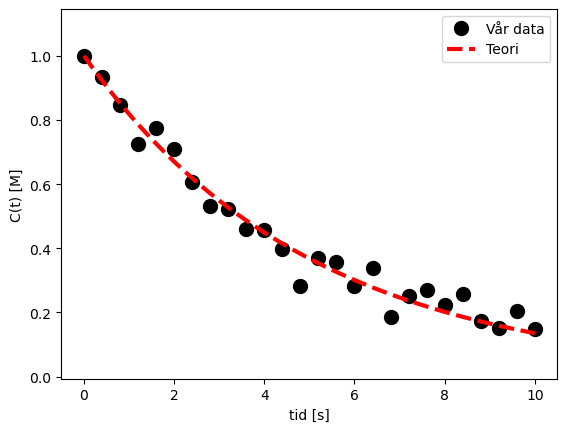

In [12]:
plt.plot(t,Cr,ls='',marker='o',markevery=40,color='k',ms=10,label='Vår data')
plt.plot(t, expt,ls='--',c='r',lw=3,label='Teori')
plt.xlabel('tid [s]')
plt.ylabel('C(t) [M]')
plt.legend()
plt.show()

# Log-lin och Log-log figurer

I vissa fall är det rätt beskrivande att visualisera i en log-lin eller log-log figur.
I vårt fall är det vettigt att ha det i en log-lin plot. 
* Fråga: Varför är det vettigt att ha det i en log-lin plot?

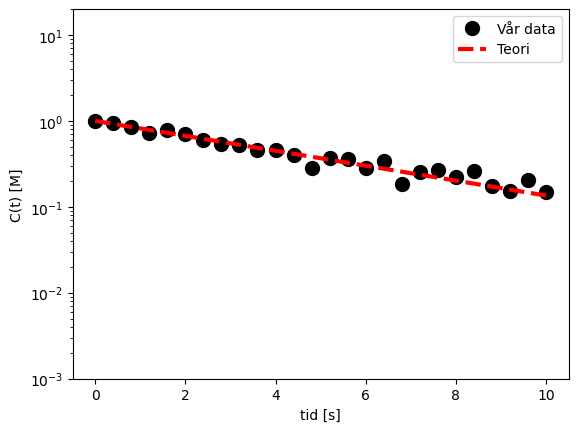

In [13]:
plt.plot(t,Cr,ls='',marker='o',markevery=40,color='k',ms=10,label='Vår data')
plt.plot(t,expt,ls='--',c='r',lw=3,label='Teori')
plt.xlabel('tid [s]')
plt.ylabel('C(t) [M]')
plt.yscale('log')
plt.legend()
plt.ylim([0.001,20])
plt.show()

# Övning 4:

I ovanstående fall har vi använt oss av `plt.ylim()`, där vi kan bestämma i vilket $y$-interaval vi ska visa grafen. Dock så finns det rätt mycket "död" yta. Ändra så att gränserna så att du minimerar "död" ytan men forfarande visar mesta av datan.

# Histograms och scatter plots och error-bars och inset

Två andra typer av grafer är ju diverse histogram och scatter plots

In [14]:
C = 1.
k=0.2
dt = 0.01
T=1000
Cr = []
Er = []
t = []
Cr.append(C)
Er.append(0)
t.append(0)
for i in range(0,T):
    C = C*(1.-k*dt)
    E = random.gauss(0.0,0.05) # Här simulerar vi experimentellt "brus"
    Er.append(abs(2*E))
    Cr.append(C+E) 
    t.append((i+1)*dt)

font = {'family' : 'Times New Roman',
        'style' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)

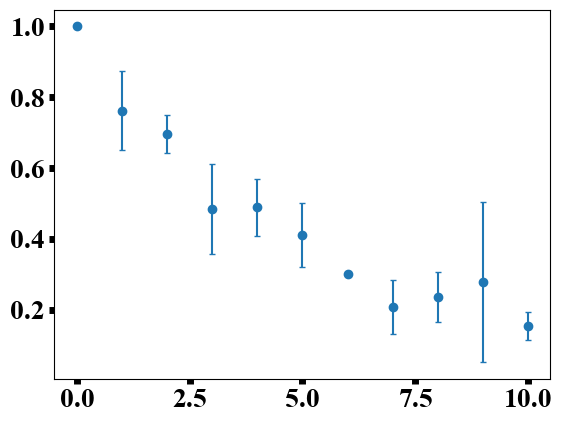

In [15]:
num = 100
plt.errorbar(t[::num],Cr[::num],yerr=Er[::num],ls='',marker='o',capsize=2)
plt.tick_params(axis='both', which='major', labelsize=20,width=5)
#plt.xticks(fontsize=14)
plt.show()

# Övning 5
* Vad gör [::num] i plot-kommandot? Ändra `num` värdet och se vad som händer.
* Texten på axlarna har ändrats. Var gjorde vi det? 
* Ändra texten till `Times New Roman` och `ìtalic` men inte felstilt (`normal`) samt minska textstorleken.

### Flera figurer i en figur

Det går även bra att ha flera figurer i en figur.
Här plot:ar vi två figurer ovanför varandra (en i lin-lin och den andra i log-lin).

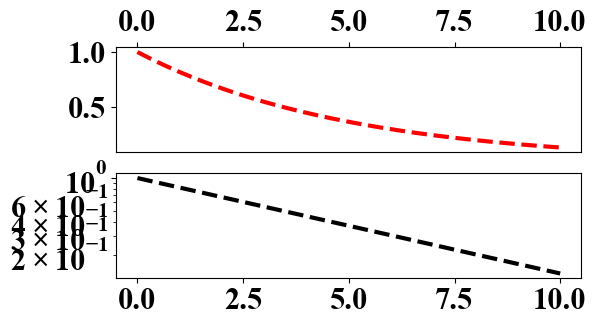

In [16]:
fig1=plt.figure(figsize=(6,3))
ax1=fig1.add_subplot(2,1,1)  #add_subplot NxM matris i detta fallet 2 rader och en kolumn, vi väljer sedan 1 figuren
ax2=fig1.add_subplot(2,1,2)  #add_second axes
ax1.plot(t,expt,ls='--',c='r',lw=3,label='Teori')
ax2.plot(t,expt,ls='--',c='k',lw=3,label='Semilog Teori')
ax2.set_yscale('log') # OBS notera skillnaden från innan 
ax1.xaxis.tick_top()
plt.show()

### Fråga: 
Vad gjorde förresten `xaxis.tick_top()`?

### Ha en figur i figuren (så kallat inset) 

Det går även bra att ha en eller flera figuer i en figur. Detta är ett smart sätt att använda sig av död yta.
Vi tittar på exemplet nedan. Här kallar vi på fig-objekten och tilldelar nya axlar. Sen ritar vi en ny figur i denna (i vårt fall samma data, men där vi ändrat intervallet för $x$).

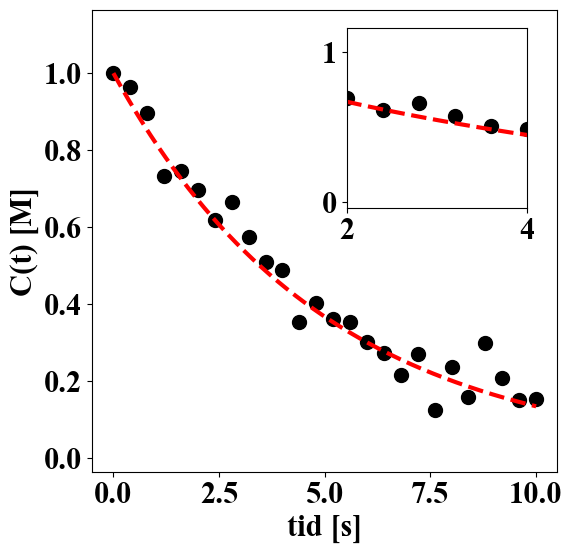

In [17]:
fig,ax=plt.subplots(figsize=(6,6))
plt.plot(t,Cr,ls='',marker='o',markevery=40,color='k',ms=10,label='Vår data')
plt.plot(t,expt,ls='--',c='r',lw=3,label='Teori')
plt.xlabel('tid [s]')
plt.ylabel('C(t) [M]')
axin = fig.add_axes([0.55, 0.55, 0.3, 0.3])
plt.plot(t,Cr,ls='',marker='o',markevery=40,color='k',ms=10,label='Vår data')
plt.plot(t,expt,ls='--',c='r',lw=3,label='Teori')
plt.xlim([2,4])
#plt.legend()
#pltin = fig.inset_axes([0.55, 0.02, 0.43, 0.43])
plt.show()

# Spara din plot
Vi kan även spara vår plot. Matplotlib stöder flera filformat (png,pdf,osv.). Vi kan även precisera dpi (dots per inch).

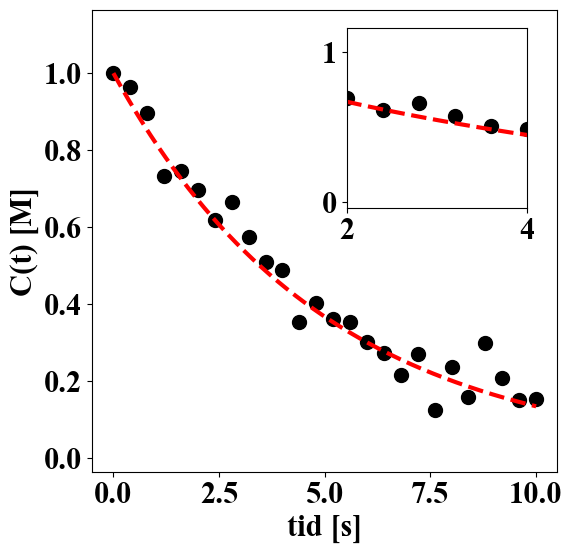

In [18]:
fig,ax=plt.subplots(figsize=(6,6))
plt.plot(t,Cr,ls='',marker='o',markevery=40,color='k',ms=10,label='Vår data')
plt.plot(t,expt,ls='--',c='r',lw=3,label='Teori')
plt.xlabel('tid [s]')
plt.ylabel('C(t) [M]')
#plt.tight_layout()
axin = fig.add_axes([0.55, 0.55, 0.3, 0.3])
plt.plot(t,Cr,ls='',marker='o',markevery=40,color='k',ms=10,label='Vår data')
plt.plot(t,expt,ls='--',c='r',lw=3,label='Teori')
plt.xlim([2,4])

plt.savefig('test.pdf',dpi=300)

# Övning 5
Hitta din sparade fil. När du hittat den ser du att figuren är beskuren på ett konstigt sätt.
Testa att göra cellen igen, men denna gången med `plt.tight_layout()`, dvs. ta bort `#` tecknet framför. Blev det bättre?

# Parameterar för graferna

Parametrar till graferna finns lagrade i rcParams. Som ni ser när ni kör cellen nedanför är detta en ganska lång lista.


In [19]:
plt.rcParams

RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': ['-layers', 'OptimizePlus'],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter.useoffset': True,
          'axes.grid': False,
          'axes.grid.axis': 'both',
   

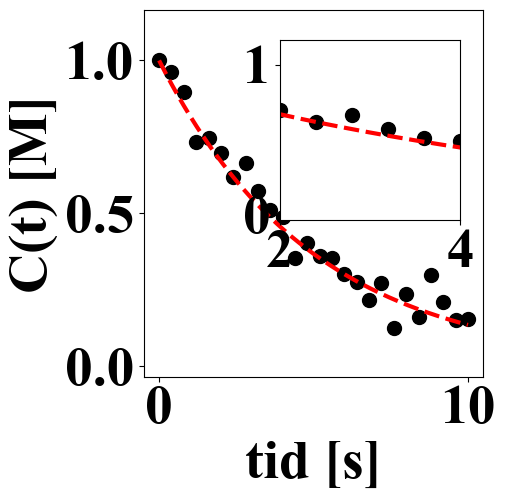

In [20]:
plt.rcParams.update({'font.size':40})
fig,ax=plt.subplots(figsize=(6,6))
plt.plot(t,Cr,ls='',marker='o',markevery=40,color='k',ms=10,label='Vår data')
plt.plot(t,expt,ls='--',c='r',lw=3,label='Teori')
plt.xlabel('tid [s]')
plt.ylabel('C(t) [M]')
plt.tight_layout()
axin = fig.add_axes([0.55, 0.55, 0.3, 0.3])
plt.plot(t,Cr,ls='',marker='o',markevery=40,color='k',ms=10,label='Vår data')
plt.plot(t,expt,ls='--',c='r',lw=3,label='Teori')
plt.xlim([2,4])
plt.show()

# Grundinställningar

Vi kan enkelt gå tillbaka till grundinställningarna genom följande kommando.

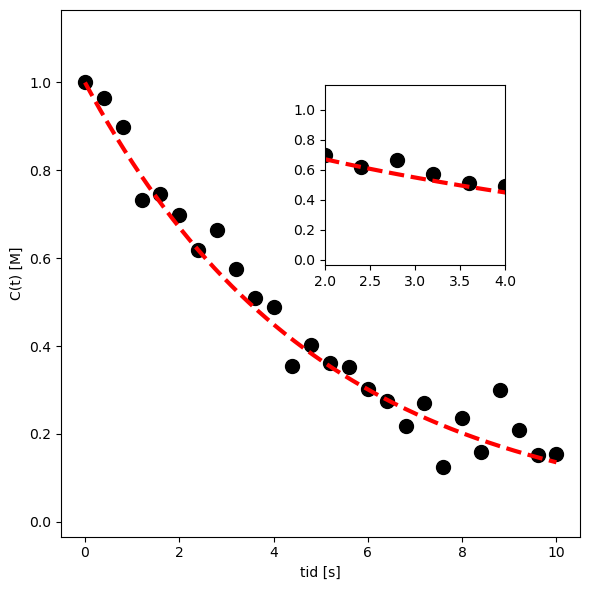

In [21]:
plt.rcdefaults()
fig,ax=plt.subplots(figsize=(6,6))
plt.plot(t,Cr,ls='',marker='o',markevery=40,color='k',ms=10,label='Vår data')
plt.plot(t,expt,ls='--',c='r',lw=3,label='Teori')
plt.xlabel('tid [s]')
plt.ylabel('C(t) [M]')
plt.tight_layout()
axin = fig.add_axes([0.55, 0.55, 0.3, 0.3])
plt.plot(t,Cr,ls='',marker='o',markevery=40,color='k',ms=10,label='Vår data')
plt.plot(t,expt,ls='--',c='r',lw=3,label='Teori')
plt.xlim([2,4])
plt.show()

# Felstaplar

I nedanstående fall så sparar vi nu även våra fel. I detta fallet har vi genererat våra felen (enligt en normalföredlning). Men i många fall så har vi en uppfattning av felet då vi gör upprepade experiment.

In [22]:
C = 1.
k=0.2
dt = 0.01
T=1000
Cr = []
Er = []
t = []
tr = []
Err = []
Cr.append(C)
Er.append(0)
Err.append(0)
t.append(0)
tr.append(0)
for i in range(0,T):
    C = C*(1.-k*dt)
    E = random.gauss(0.0,0.05) # Här simulerar vi experimentellt "brus"
    Et = random.gauss(0.0,0.02) # Här simulerar vi experimentellt "brus"
    Er.append(abs(2*E))
    Err.append(E)
    Cr.append(C+E) 
    t.append((i+1)*dt+Et)
    tr.append(Et)

### Felet i concentrationen
Vi börjar med att titta på felet vi lagt på (eller uppmät) i vår koncentration. I detta fallet så ritar vi grafen med hjälp av `scatter()`-funktionen, som markerar ut våra punkter.

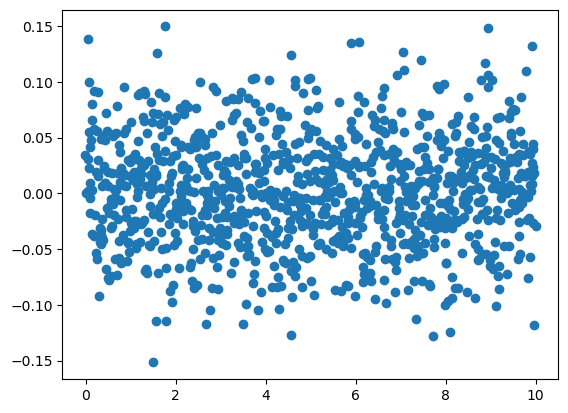

In [23]:
plt.scatter(t,Err)
plt.show()

### Vi kan även anta att vi har en mätosäkerhet i tidtagningen.

Låt oss nu generera en graf som visar felen för varje mätpunkt. 
Så på $x$-axeln har vi en punkts fel i tid och på $y$-axeln felet i koncentration. 
Vi ser att bi får en massa punkter med en högra täthet i mitten.

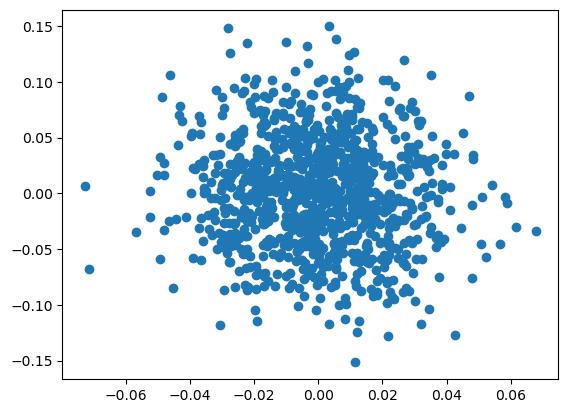

In [24]:
plt.scatter(tr,Err)
plt.show()

### Fråga
Vad betyder det att datan är sprid runt nollan och origo i dessa grafer?

# Övning
Anta att felet i tiden är direkt proportionelligt mot felet i koncentrationen. Hur ser då din scatter-graf ut?

# Histogram

Matplotlib innehåller även funktioner för att göra stabeldiagram. I fallet nedan så använder vi oss av `plt.hist()`. Vi kan välja att ange antal staplar ('bins').

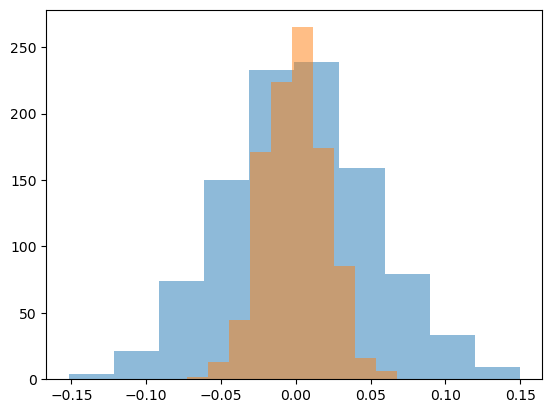

In [25]:
plt.hist(Err,alpha=0.5,bins=10)
plt.hist(tr,alpha=0.5,bins=10)
plt.show()

# Övning 7

* Ändra antal staplar och se vad som händer.
* Vad göra `alpha`? Ändra dess värden (mellan 0 och 1)

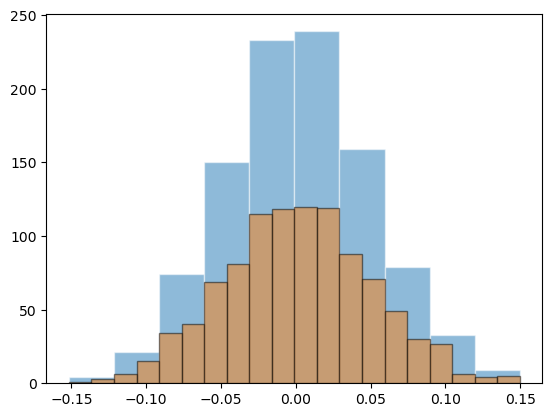

In [26]:
plt.hist(Err,alpha=0.5,bins=10,edgecolor='w')
plt.hist(Err,alpha=0.5,bins=20,edgecolor='k')
plt.show()

### I ovanstående fallet ser vi att höjden varierar med antal staplar.
I fallet man är ute efter en sannolikhetstäthet, så kan man precisera "density=True". Den ser till att integralen/summan blir 1, dvs. normaliserad.

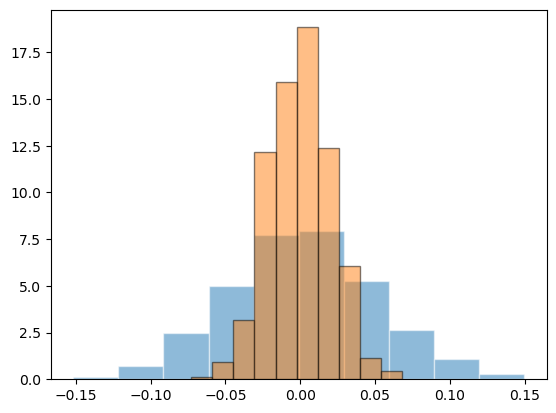

In [27]:
plt.hist(Err,alpha=0.5,bins=10,density=True,edgecolor='w')
plt.hist(tr,alpha=0.5,bins=10,density=True,edgecolor='k')
plt.show()

# Övning
Gör två överlappande stabel diagram för samma data (och med 'density=True'), men där du ändra antal staplar.
Vad ser vi?

# Övning 
I nedan stående fall så ritar vi ut två normalfördelingar (båda är normaliserad) med en viss bredd.
Vår feldata var genererade från två olika normalfördelningar. 
Ändra 'sigma' så att du för ett bra överlapp. Vad är egentligen rätt värden?

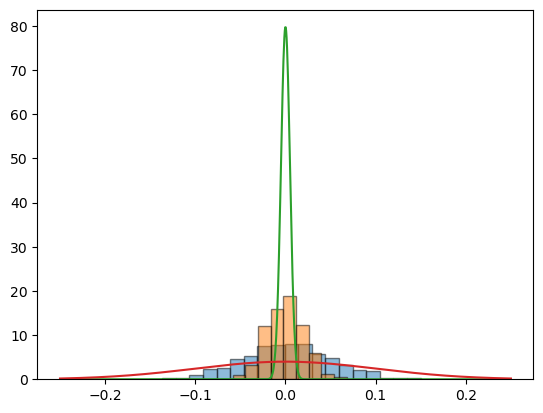

In [28]:
import numpy as np
plt.hist(Err,alpha=0.5,bins=20,density=True,ec='k')
plt.hist(tr,alpha=0.5,bins=10,density=True,ec='k')
tt = np.linspace(-0.25,0.25,1000)
sigma = 0.005
plt.plot(tt,1./(sigma*np.sqrt(2.*np.pi))*np.exp(-tt*tt/(2.*sigma**2)))
sigma = 0.1
plt.plot(tt,1./(sigma*np.sqrt(2.*np.pi))*np.exp(-tt*tt/(2.*sigma**2)))
plt.show()


# 2D Histogram

Vi kan också skapa tvådimensionella stabeldiagram. Istället för stablar brukar man ha en färgkarta som visar på frekvensen eller magnituden. Det liknar rätt mycket histogram, men nu ger vi två "arrays". Vi visar även färgkartan till höger.

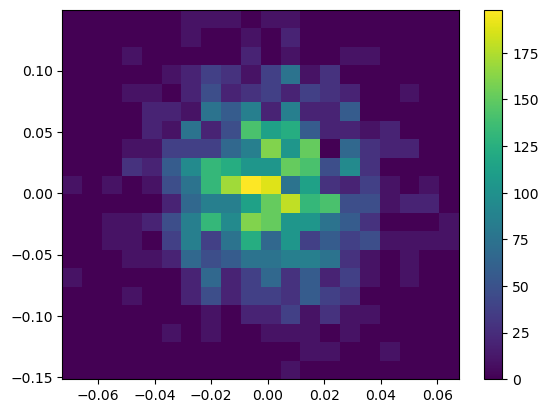

In [29]:
plt.hist2d(tr, Err, density=True,bins=20)
plt.colorbar()
plt.show()

# Övning
* Ändra antal staplar
* Ändra färgkatan genom att lägga in `cmap='magma'` som ett argument.

# Mer läsning
[Matplotlibs](https://matplotlib.org) hemsida innehåller mycket bra information. I övrigt så finns det mycket bra online material. Oftast räcker detta att söka i en sökmotor (specifisera "matplotlib"), både vad gäller generell information men också för att lösa diverse "problem"/frågeställningar (oftast hamnar man på [Stackoverflow](https://stackoverflow.com))


# 2D grafer med matplotlib och numpy
Vi kommer att lära oss mer om `Numpy` nästa föreläsning. Detta bibliotek är väldigt användbart.
I detta fallet använder vi numpy för att läsa in en matris med tal. I det specifika fallet är vi interesserad av en sannolikhet att hitta en annan jon i närheten av en första på en tvådimensionel yta.
Vi gör detta genom att anvädna oss av `plt.imshow()`. Figuren liknar rätt mycket 2D stapeldiagrammet vi gjorde innan.


[[52468. 51547. 52361. ... 49516. 50177. 49806.]
 [52726. 52369. 50461. ... 50480. 50852. 50642.]
 [51503. 51058. 50219. ... 50953. 49926. 51044.]
 ...
 [51838. 50199. 50114. ... 48591. 49564. 49763.]
 [50143. 50379. 50348. ... 49346. 51064. 51814.]
 [50052. 50675. 50242. ... 50601. 51791. 52472.]]


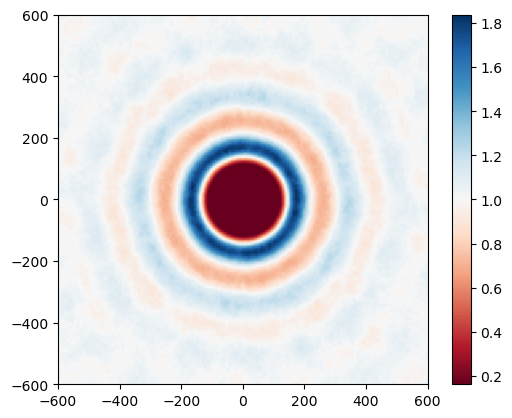

In [15]:
import numpy as np
Gr2d = np.loadtxt("gr2dwigner.dat")
print(Gr2d)

im = plt.imshow(Gr2d/Gr2d.mean(), cmap="RdBu", vmin=max(2.-Gr2d.max()/Gr2d.mean(),0), vmax=Gr2d.max()/Gr2d.mean(),extent=[-600, 600, -600, 600])
plt.colorbar()
plt.show()

# 3D grafer
Det är även möjligt att göra 3D grafer (även om det oftast inte är att rekommendera då de är svårtolkade)

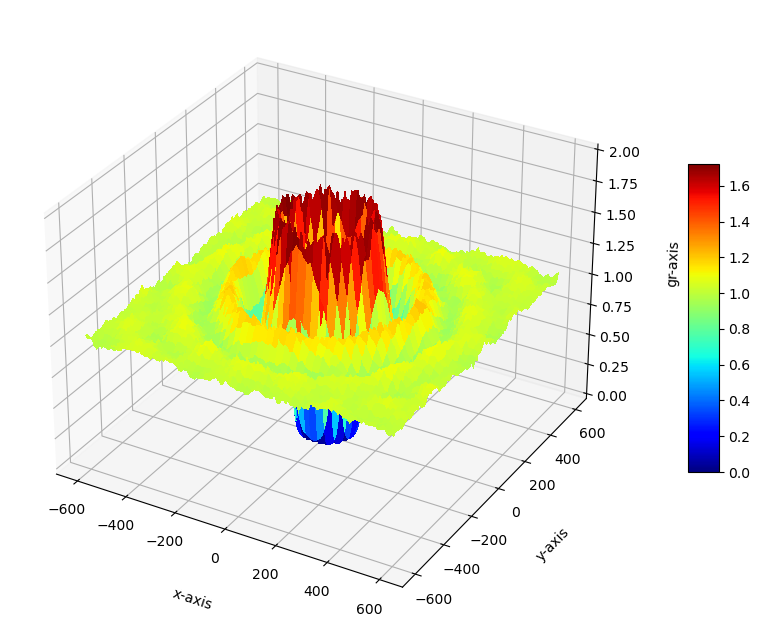

In [40]:
from mpl_toolkits.mplot3d import Axes3D
fig= plt.figure(figsize=(16,8))
ax= fig.add_subplot(projection='3d')
#print(Gr2d.shape)
x = np.linspace(-600,600,139,endpoint=True)
y = np.linspace(-600,600,139,endpoint=True)
X,Y=np.meshgrid(x,y)
Z = Gr2d/Gr2d.mean()

surf=ax.plot_surface(X,Y,Z,cmap='jet',antialiased=False)
#ax.contourf(X, Y, Z, zdir='z',offset=0., cmap='jet')
#ax.contourf(X, Y, Z, zdir='x',offset=-600,cmap='jet')
#ax.contourf(X, Y, Z, zdir='y',offset=600, cmap='jet')
fig.colorbar(surf, shrink=0.5, aspect=10)
ax.set_zlim3d(-0,2)
ax.set_xlabel('x-axis',labelpad=15)
ax.set_ylabel('y-axis',labelpad=15)
ax.set_zlabel('gr-axis',labelpad=15)
plt.show()